<a href="https://colab.research.google.com/github/kushwahapriya878/Python-Projects/blob/main/Business_Case_Yulu_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Submitted by:Priya Kushwaha

# **Business Case: Yulu - Hypothesis Testing**

# **Table of Contents:Business Case: Yulu - Hypothesis Testing**


*   About Yulu

*   Obejctive
*   Features of the data set
*   Exploratory Data Analysis(EDA)
*   Statistcal summary
*   Duplicate detection
*   Missing Value Analysis

# **Questions:-**


1.   Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
2.  Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)
3. Select an appropriate test to check whether:


*   Working Day has effect on number of electric cycles rented
*   No. of cycles rented similar or different in different seasons
*   No. of cycles rented similar or different in different weather.
*   Weather is dependent on season (check between 2 predictor variable).
4.   Set up Null Hypothesis (H0)
5.   State the alternate hypothesis (H1).
6.   Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional).
*   Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary.
7. Set a significance level (alpha).
8. Calculate test Statistics.
9. Decision to accept or reject null hypothesis.
10. Inference from the analysis





# **About Yulu**
Yulu’s mission is to make urban mobility in India seamless, shareable and sustainable. What started off as an initiative to reduce traffic congestion and pollution in Indian cities, is now redefining urban mobility across the country.
Yulu is a technology-driven mobility platform that enables Integrated Urban Mobility across public and private modes of transport. Using Micro Mobility Vehicles (MMVs) through a user-friendly mobile app, Yulu enables first and last-mile connectivity that is seamless, shared and sustainable.

# **Obejctive**
The company wants to know:
*  Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
*  How well those variables describe the electric cycle demands

# **Features of the data set**

1.   **datetime:** datetime
2.   **season:** season (1: spring, 2: summer, 3: fall, 4: winter)
3.   **holiday:** whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
4.  **workingday:** if day is neither weekend nor holiday is 1, otherwise is 0.
5.  **weather:**


*   **1:** Clear, Few clouds, partly cloudy, partly cloudy
*   **2 :** Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
*   **3:** Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
*   **4:** Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
6.  **temp:** temperature in Celsius
7.  **atemp:** feeling temperature in Celsius
8.  **humidity:** humidity
9.  **windspeed:** wind speed
10. **casual:** count of casual users
11. **registered:** count of registered users
12. **count:** count of total rental bikes including both casual and registered



In [2]:
#Importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading Yulu dataset
df= pd.read_csv('bike_sharing.txt')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# **Exploratory Data Analysis(EDA)**

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [ ]:
len(df)

10886

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.shape

(10886, 12)

In [ ]:
df.size

130632

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#changing datetime col to datetime format
df['datetime']=pd.to_datetime(df['datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


# **Statistcal Summary**

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000




*   **temp** 75% temp is less than 26 degree celsius
*   **atemp**75% atemp lass than 31 degree celsius.
*  **count**75% casual and registered users are less than 284.



# **Missing value detection**

In [ ]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In this data set no miising value present.

# Sanity check for column

In [ ]:
#checking unique value column wise
for i in df.columns:
  print('Unique value in column',i,'are:-')
  print(df[i].unique())
  print('-'*70)

Unique value in column datetime are:-
['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']
----------------------------------------------------------------------
Unique value in column season are:-
[1 2 3 4]
----------------------------------------------------------------------
Unique value in column holiday are:-
[0 1]
----------------------------------------------------------------------
Unique value in column workingday are:-
[0 1]
----------------------------------------------------------------------
Unique value in column weather are:-
[1 2 3 4]
----------------------------------------------------------------------
Unique value in column temp are:-
[ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.

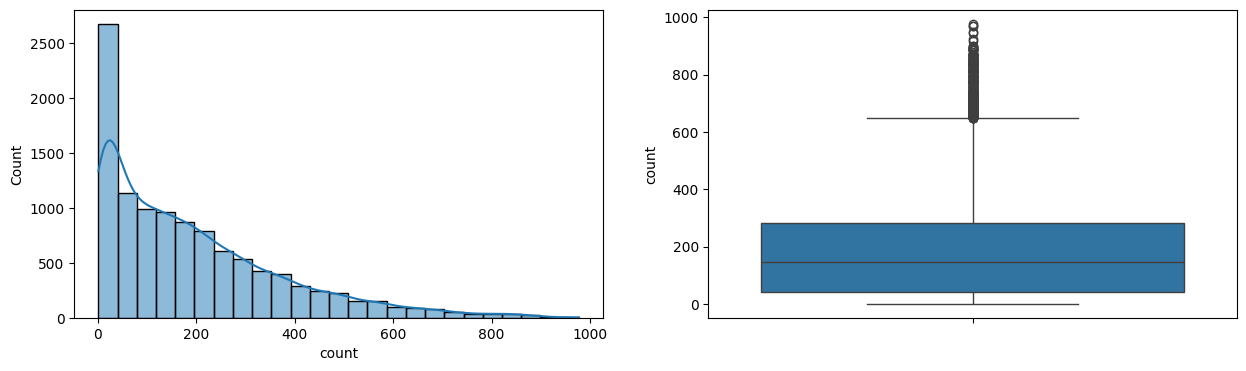

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.histplot(data=df['count'], kde=True, bins=25)
plt.subplot(1,2,2)
sns.boxplot(data=df, y='count')
plt.show()

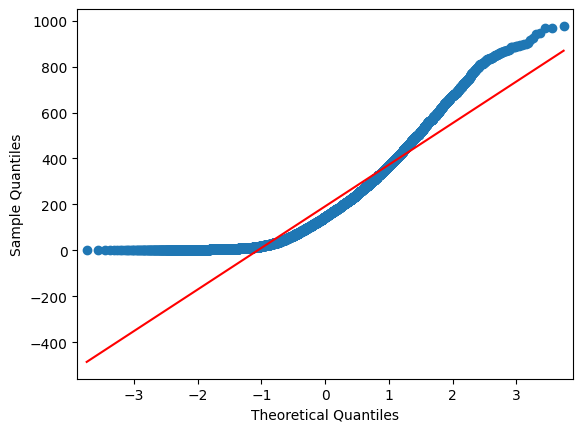

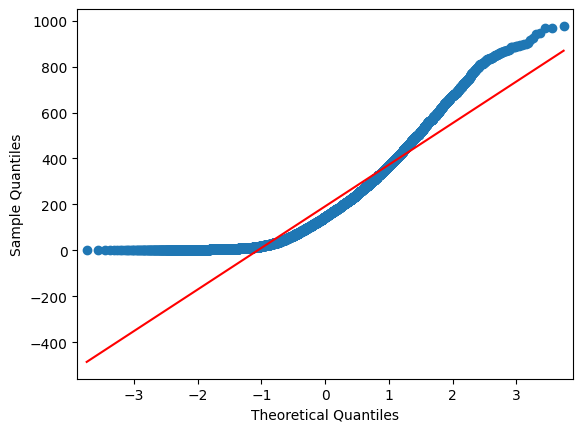

In [ ]:
from statsmodels.graphics.gofplots import qqplot
count=df['count']
qqplot(count,line='s')


# **Insight**

**count:** As per above analysis data is not normally distributed. Dataset having more outlier towards right side.  

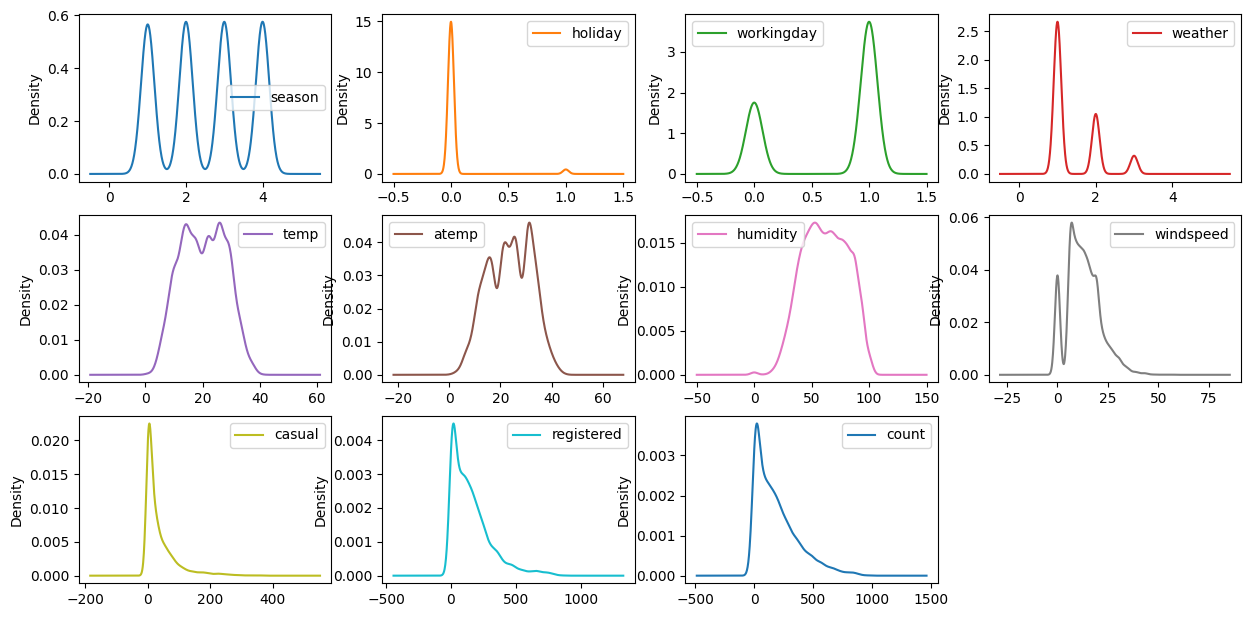

In [ ]:
plt.rcParams['figure.figsize']=(15,10)
df.plot(kind= 'density', subplots=True, layout=(4,4), sharex=False )
plt.show()

# **Question no-2:**
Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)

OneWay Anova Hypothesis testing for checking the mean of count for working day

# Distribution of columns Season, Holiday, Workingday,atemp, humidity, windspeed, count

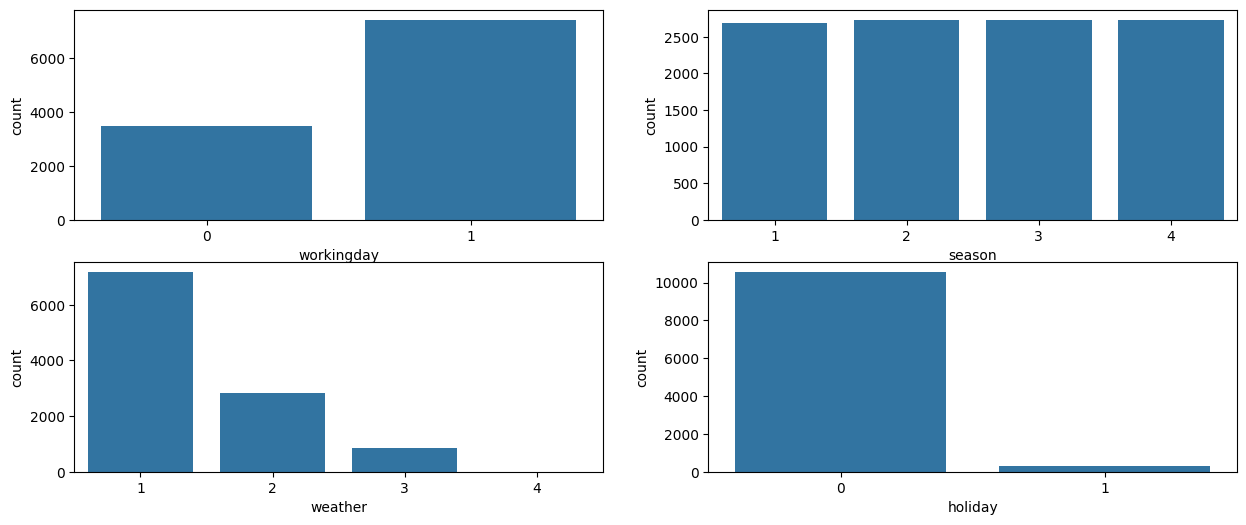

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.countplot(data=df, x='workingday')

plt.subplot(2,2,2)
sns.countplot(data=df, x='season')
plt.subplot(2,2,3)
sns.countplot(data=df, x='weather')
plt.subplot(2,2,4)
sns.countplot(data=df, x='holiday')
plt.show()

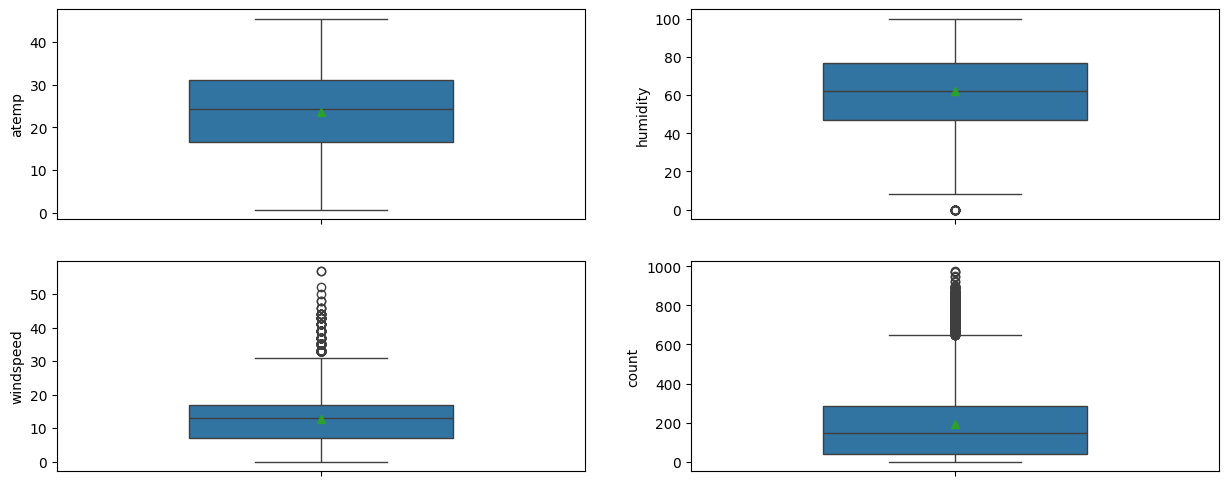

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.boxplot(data=df, y='atemp',showmeans=True, width=0.5)
plt.subplot(2,2,2)
sns.boxplot(data=df, y='humidity',showmeans=True, width=0.5)
plt.subplot(2,2,3)
sns.boxplot(data=df, y='windspeed',showmeans=True, width=0.5)
plt.subplot(2,2,4)
sns.boxplot(data=df, y='count', showmeans=True, width=0.5)
plt.show()

In [ ]:
df['season'].value_counts(normalize=True)

season
4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: proportion, dtype: float64

In [ ]:
df['workingday'].value_counts(normalize=True)

workingday
1    0.680875
0    0.319125
Name: proportion, dtype: float64

In [ ]:
df['weather'].value_counts(normalize=True)

weather
1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: proportion, dtype: float64

# Insight

 **season:** Season is uniformaly distributed spring 24%, summer 25%, fall 25%, winter 25% .

 **weather:** we get most clear waether 66% ,sometime we get mist weather 26% rear we get bad weather 7%.

 **workingday** 68% user rented cycle on working day and 31% rented on non_working day.

 **Atemp:** Atemp is almost uniform distibuted.

**windspeed:** windspeed having upper outlier.

**count:** count having more upper outlier.

# Droping outlier from data set

In [ ]:
#calculating 25 & 75 percintile
q1=np.percentile(df['count'], 0.25)
q3=np.percentile(df['count'], 0.75)
#calculating inter quartile range
IQR= q3-q1
print('IQR=>', IQR)
lower_outlier= q1 -1.5 * IQR
print('lower_outlier=>',lower_outlier)
upper_outlier= q3 + 1.5 *IQR
print('upper_outlier=>',upper_outlier)
#removing outlier from data set
df1=df[(df['count']>lower_outlier) | (df['count']<upper_outlier)].copy(deep=True)
print(df1.shape)
df1.head()

IQR=> 0.0
lower_outlier=> 1.0
upper_outlier=> 1.0
(10781, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0,2,0,2


# Checking correlation

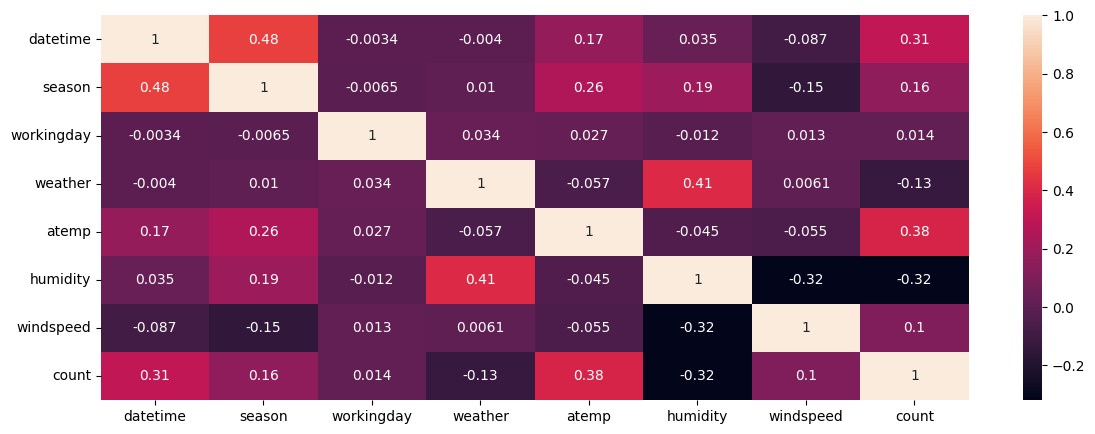

In [ ]:
fig, ax=plt.subplots(figsize=(14,5))
df1_corr=sns.heatmap(df1.drop(columns=['holiday','casual','registered','temp']).corr(), annot=True, ax=ax)


# Insight

By looking at heatmap Count and atemp ai highly correlated, weather and humidity is also correlated and season and weather is also highly correlated.

# **Hypothesis Testing**

***Working Day has effect on number of electric cycles rented***

In [ ]:
#Setting null hypothesis and alternate hypothesis
Ho= "Working day has no effect on number of electric cycles rented."
Ha= "Working day has effect on number of electric cycles rented."
# Doing this test at 95% confidence level
alpha= 0.05

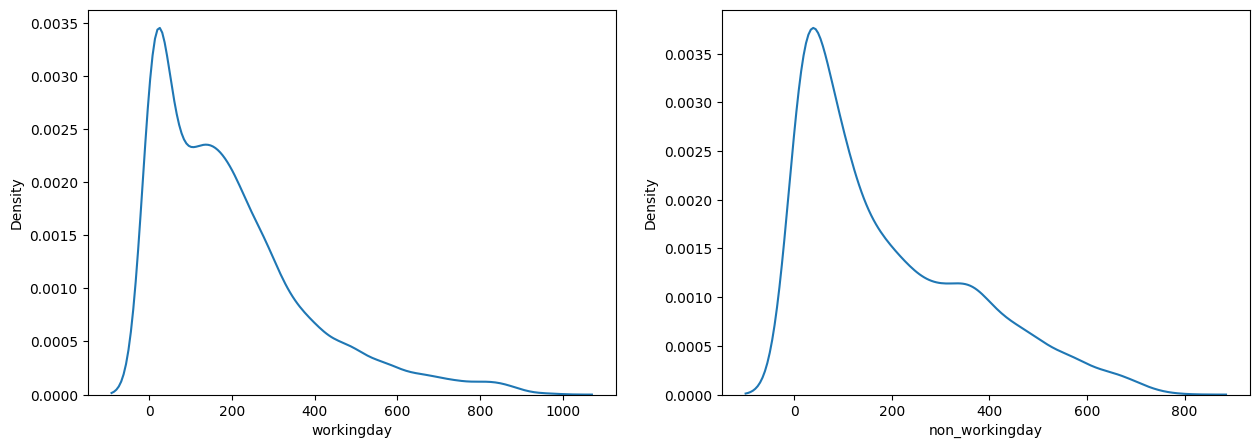

In [ ]:
# filtering the data for working and non working day
workingday_df=df1[df1['workingday']==1]['count']
non_workingday_df=df1[df1['workingday']==0]['count']
# checking the distribution of the data
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(workingday_df)
plt.xlabel('workingday')
plt.subplot(1,2,2)
sns.kdeplot(non_workingday_df)
plt.xlabel('non_workingday')
plt.show()

By looking at this graph the data is not uniformally distributed

## Mann-Whitney U Test (Wilcoxon Rank-Sum Test):
This test is used to compare differences between two independent groups when the dependent variable is either ordinal or continuous, but not normally distributed.

In [ ]:
#importing library
from scipy.stats import mannwhitneyu

In [ ]:
stat, p_value= mannwhitneyu(workingday_df, non_workingday_df)
print('Mann-Whitney U Test=>',stat )
print('p_value=>', p_value)

Mann-Whitney U Test=> 12713725.5
p_value=> 0.6812563064062955


In [ ]:
t_stat, p_value=ttest_ind(workingday_df, non_workingday_df)
print('t_stat=>', t_stat)
print('p_value=>', p_value)

t_stat=> 1.4895186285566733
p_value=> 0.1363801091813147


In [ ]:
# at 5% significance level alpha=0.05
alpha=0.05
p_value=0.681
if p_value<alpha:
  print("reject Ho=> Working day has effect on number of electric cycles rented.")
else:
  print("failed to reject H0 => Working day has no effect on number of electric cycles rented.")

failed to reject H0 => Working day has no effect on number of electric cycles rented.


# Insight
Mann-Whitney U Test between workingday and count (data is not normally distributed.

Setting null hypothesis and alternate hypothesis

Ho= "Working day has no effect on number of electric cycles rented."

Ha= "Working day has effect on number of electric cycles rented."

Doing this test at 95% confidence level
alpha= 0.05

p_value=0.681

 At 5% significance level we are failing to reject Ho as p_value is 0.681 which is greater than alpha => Working day has no effect on number of electric cycles rented.


# **No. of cycles rented similar or different in different seasons**

In [ ]:
#Setting null hypothesis and alternate hypothesis
Ho= "There is no difference in No.of cycle rented in seasons"
Ha= "There is difference in No.of cycle rented in seasons"
# Doing this test at 95% confidence level
alpha= 0.05

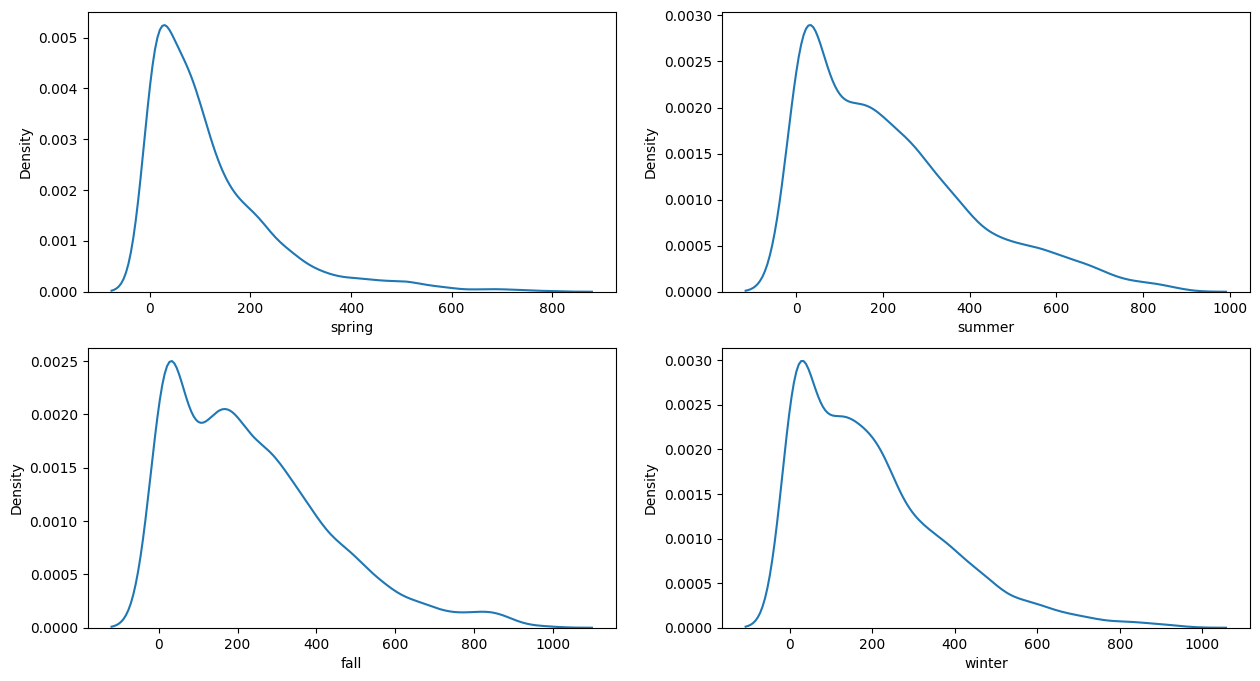

In [ ]:
# filtering the data for season wise
spring_df=df1[df1['season']==1]['count']
summer_df=df1[df1['season']==2]['count']
fall_df=df1[df1['season']==3]['count']
winter_df=df1[df1['season']==4]['count']
# checking the distribution of the data
plt.figure(figsize=(15,8))
fig.tight_layout(pad=5)
plt.subplot(2,2,1)
sns.kdeplot(spring_df)
plt.xlabel('spring')
plt.subplot(2,2,2)
sns.kdeplot(summer_df)
plt.xlabel('summer')
plt.subplot(2,2,3)
sns.kdeplot(fall_df)
plt.xlabel('fall')
plt.subplot(2,2,4)
sns.kdeplot(winter_df)
plt.xlabel('winter')
plt.show()

By looking at this graph data in not normaly distributed.
so here i will go with **Kruskal-Wallis H Test** as all groups are independent and there more than two group

In [ ]:
#importing library
from scipy.stats import kruskal

In [ ]:
stat, p_value=kruskal(spring_df, summer_df, fall_df, winter_df)
print('k_stat=>', stat)
print('p_value=>', p_value)

k_stat=> 627.2515377964959
p_value=> 1.2456924791629288e-135


In [ ]:
#comparing p_value
# at 5% significance level alpha=0.05
alpha=0.05
p_value=p_value
if p_value<alpha:
  print("reject Ho=> There is difference in No.of cycle rented in seasons.")
else:
  print("failed to reject H0 => There is no difference in No.of cycle rented in seasons")

reject Ho=> There is difference in No.of cycle rented in seasons.


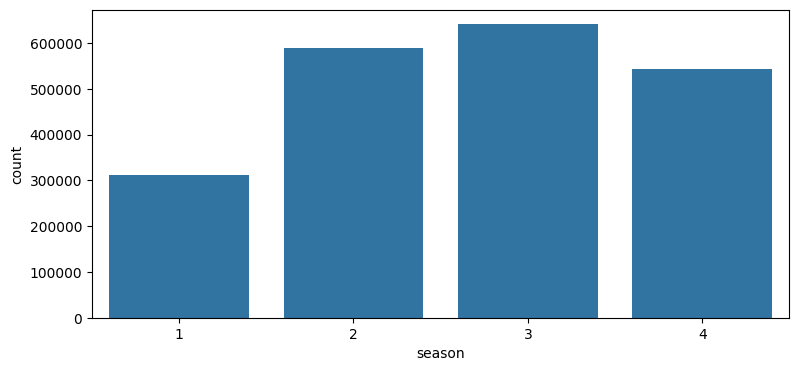

In [ ]:
season_count_df=df1.groupby(by='season')['count'].sum()
season_count_df=season_count_df.reset_index().sort_values(by='count')
plt.figure(figsize=(9,4))
sns.barplot(data=season_count_df, x='season', y='count')
plt.show()

# Insight
Kruskal-Wallis H Test  between season and count (data is not normally distributed.

Setting null hypothesis and alternate hypothesis

Ho= "There is no difference in No.of cycle rented in seasons"

Ha= "There is difference in No.of cycle rented in seasons"

Doing this test at 95% confidence level
alpha= 0.05

p_value=> 1.2456924791629288e-135

 At 5% significance level we are rejecting null hypothesis Ho as p_value=> 1.2456924791629288e-135 which is less than alpha =>There is difference in No.of cycle rented in seasons

# ***No. of cycles rented similar or different in different weather***

In [ ]:
#Setting null hypothesis and alternate hypothesis
Ho= "There is no difference in No.of cycle rented in weather"
Ha= "There is difference in No.of cycle rented in weather"
# Doing this test at 95% confidence level
alpha= 0.05

<ipython-input-91-14151e80a0fc>:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(heavyrain_weather_df)


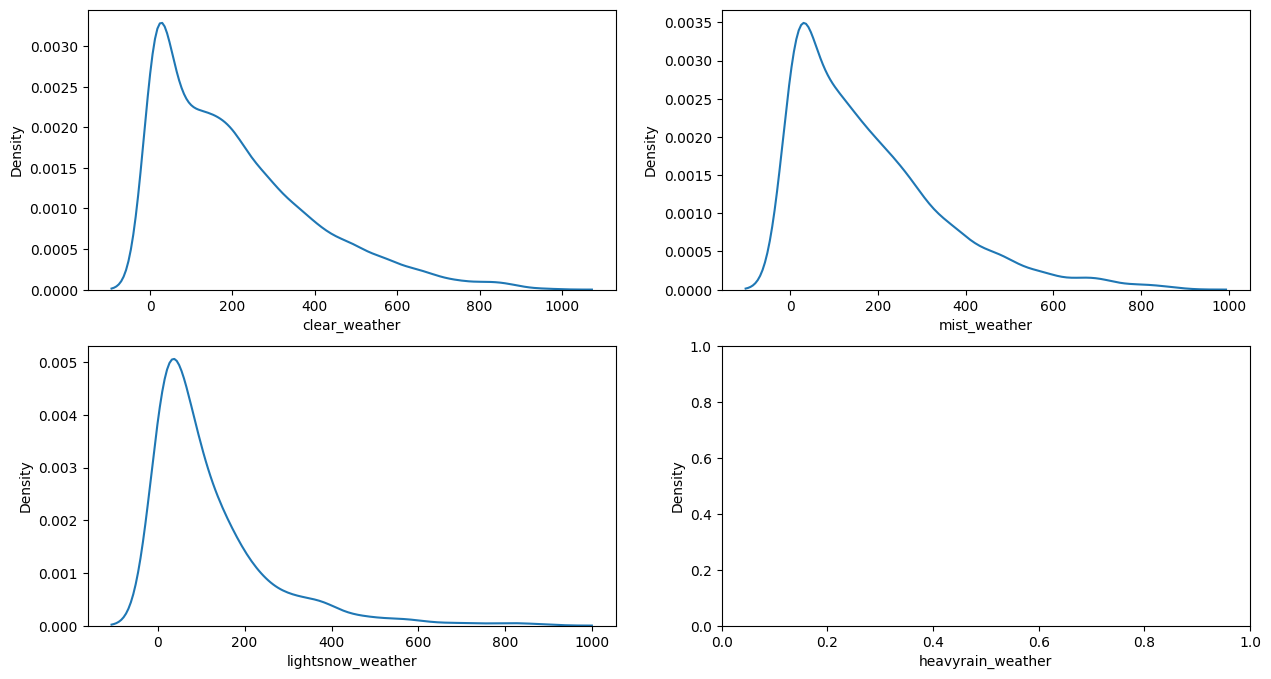

In [ ]:
# filtering the data for season wise
clear_weather_df=df1[df1['weather']==1]['count']
mist_weather_df=df1[df1['weather']==2]['count']
lightsnow_weather_df=df1[df1['weather']==3]['count']
heavyrain_weather_df=df1[df1['weather']==4]['count']
# checking the distribution of the data
plt.figure(figsize=(15,8))
fig.tight_layout(pad=5)
plt.subplot(2,2,1)
sns.kdeplot(clear_weather_df)
plt.xlabel('clear_weather')
plt.subplot(2,2,2)
sns.kdeplot(mist_weather_df)
plt.xlabel('mist_weather')
plt.subplot(2,2,3)
sns.kdeplot(lightsnow_weather_df)
plt.xlabel('lightsnow_weather')
plt.subplot(2,2,4)
sns.kdeplot(heavyrain_weather_df)
plt.xlabel('heavyrain_weather')
plt.show()

In [ ]:
#importing library
from scipy.stats import kruskal

In [ ]:
stat, p_value=kruskal(clear_weather_df, mist_weather_df, lightsnow_weather_df, heavyrain_weather_df)
print('k_stat=>', stat)
print('p_value=>', p_value)

k_stat=> 202.92475702948178
p_value=> 9.84421396060184e-44


In [ ]:
#comparing p_value
# at 5% significance level alpha=0.05
alpha=0.05
p_value=p_value
if p_value<alpha:
  print("reject Ho=> There is difference in No.of cycle rented in weather.")
else:
  print("failed to reject H0 => There is no difference in No.of cycle rented in weather")

reject Ho=> There is difference in No.of cycle rented in weather.


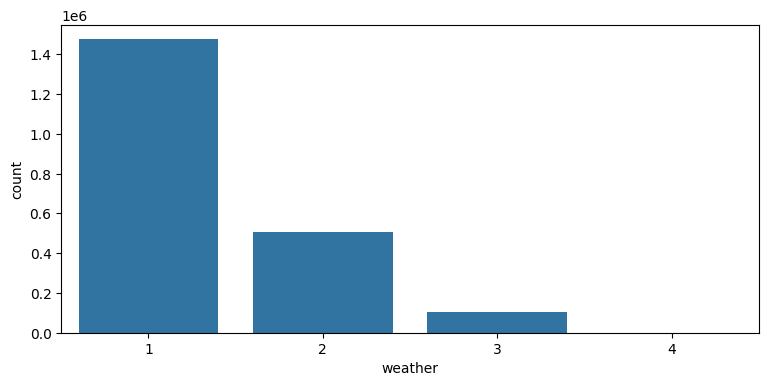

In [ ]:
weather_count_df=df1.groupby(by='weather')['count'].sum()
weather_count_df=weather_count_df.reset_index().sort_values(by='count')
plt.figure(figsize=(9,4))
sns.barplot(data=weather_count_df, x='weather', y='count')
plt.show()

# Insight
Kruskal-Wallis H Test  between season and count (data is not normally distributed.

Setting null hypothesis and alternate hypothesis

Ho= "There is no difference in No.of cycle rented in weather"

Ha= "There is difference in No.of cycle rented in weather"

Doing this test at 95% confidence level
alpha= 0.05

p_value=> 9.84421396060184e-44

 At 5% significance level we are rejecting null hypothesis Ho as p_value=> 9.84421396060184e-44 which is less than alpha => There is difference in No.of cycle rented in weather.

# ***Weather is dependent on season (check between 2 predictor variable)***

In [ ]:
#Setting null hypothesis and alternate hypothesis
Ho= "Weather is not dependent on season"
Ha= "Weather is dependent on season"
# Doing this test at 95% confidence level
alpha= 0.05

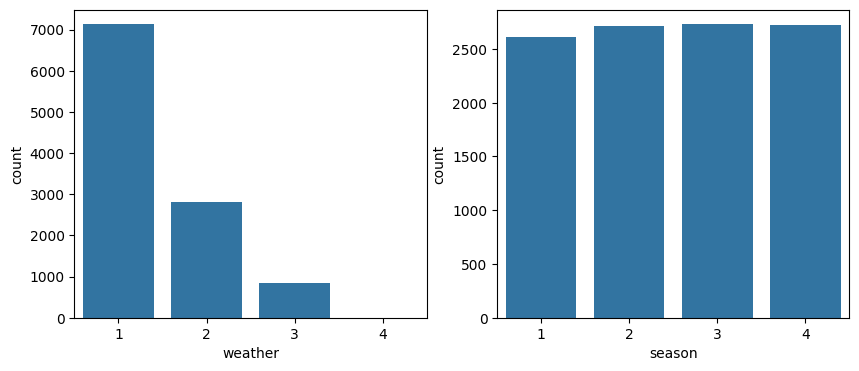

In [ ]:
# checking the distribution of the data
plt.figure(figsize=(10,4))
fig.tight_layout(pad=5)
plt.subplot(1,2,1)
sns.countplot(data=df1, x='weather')

plt.subplot(1,2,2)
sns.countplot(data=df1, x='season')

plt.show()

In [ ]:
#importing library
from scipy.stats import chi2_contingency

In [ ]:
weather_season_df=pd.crosstab(index=df1['weather'], columns=df1['season'])
weather_season_df

season,1,2,3,4
weather,,,,
1,1712,1791,1928,1695
2,694,705,604,806
3,203,221,197,224
4,1,0,0,0


In [ ]:
chi_stat, p_value, df, exp_value=chi2_contingency(weather_season_df)
print('chi_stat=>', chi_stat)
print('p_value=>', p_value)

chi_stat=> 49.604326873547436
p_value=> 1.2783986926254513e-07


In [ ]:
#comparing p_value
# at 5% significance level alpha=0.05
alpha=0.05
p_value=p_value
if p_value<alpha:
  print("reject Ho=> Weather is dependent on season")
else:
  print("failed to reject H0 => Weather is not dependent on season")

reject Ho=> Weather is dependent on season


# Insight
Chi2 contingency test  between season and count

Setting null hypothesis and alternate hypothesis

Ho= "Weather is not dependent on season"

Ha= "Weather is dependent on season"

Doing this test at 95% confidence level
alpha= 0.05

p_value=> 1.2783986926254513e-07

 At 5% significance level we are rejecting null hypothesis Ho as p_value=> 1.2783986926254513e-07 which is less than alpha => Weather is dependent on season

# *   Set up Null Hypothesis (H0)
# *   State the alternate hypothesis (H1)
# *   Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
# *   Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary



# **Checking distrubution of count Vs season**

In [ ]:
# Ho = Electric cycles are equally distrubuted in each season spring, summer, fall and winter so the mean of all four seasons are equal.
# Ha = Electric cycles are not equally distrubuted in each season spring, summer, fall and winter so the mean of all four seasons are not equal.

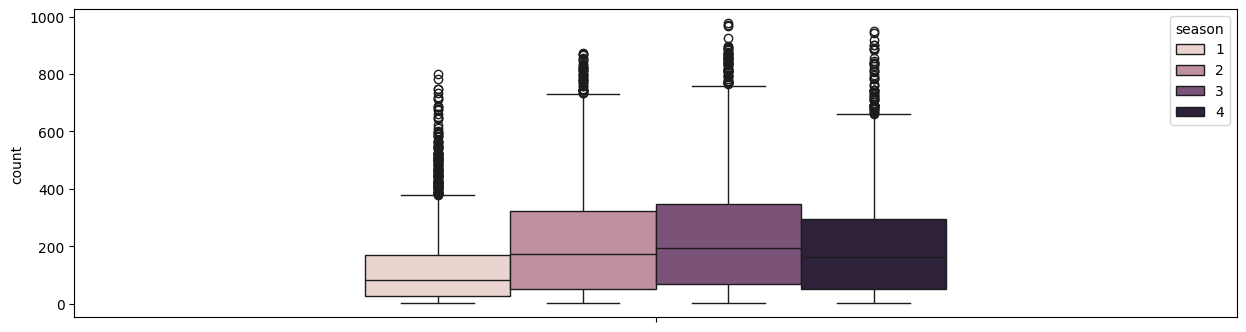

In [ ]:
plt.figure(figsize=(15,4))
sns.boxplot(data=df1, y='count', hue='season', width=0.5)
plt.show()

by looking at this graph i am not sure that the mean of all four season are equal so here i will do one way anova hypotheis testing.

In [ ]:
#importing library
from scipy.stats import f_oneway

In [ ]:
# filtering the data for season wise
spring_df=df1[df1['season']==1]['count']
summer_df=df1[df1['season']==2]['count']
fall_df=df1[df1['season']==3]['count']
winter_df=df1[df1['season']==4]['count']

In [ ]:
f_stat, p_value= f_oneway(spring_df, summer_df, fall_df, winter_df)
print('f_stat=>', f_stat)
print('p_value=>', p_value)

f_stat=> 220.14278940112067
p_value=> 1.294051664486501e-138


In [ ]:
#at 5% significance level alpha= 0.05
alpha=0.05
p_value=p_value
if p_value< alpha:
  print("reject Ho=> Electric cycles are not equally distrubuted in each season spring, summer, fall and winter so the mean of all four seasons are not equal.")
else:
  print("failed to reject Ho=> Electric cycles are equally distrubuted in each season spring, summer, fall and winter so the mean of all four seasons are equal.")

reject Ho=> Electric cycles are not equally distrubuted in each season spring, summer, fall and winter so the mean of all four seasons are not equal.


# Insight
One way Anova test  between season and count

Setting null hypothesis and alternate hypothesis

Ho = Electric cycles are equally distrubuted in each season spring, summer, fall and winter so the mean of all four seasons are equal.

Ha = Electric cycles are not equally distrubuted in each season spring, summer, fall and winter so the mean of all four seasons are not equal.

Doing this test at 95% confidence level
alpha= 0.05

p_value=> 1.294051664486501e-138

 At 5% significance level we are rejecting null hypothesis Ho as p_value=> 1.294051664486501e-138  which is less than alpha => Electric cycles are not equally distrubuted in each season spring, summer, fall and winter so the mean of all four seasons are not equal.

# **Checking distribution between workingday and count**

In [ ]:
# setting null hypothesis and alternate hypothesis
# Ho = Electric cycles are equally distrubuted in each workingday and non_workingday so the mean of all two workingday are equal.
# Ha = Electric cycles are not equally distrubuted in each workingday and non_workingday so the mean of all two workingday are not equal.

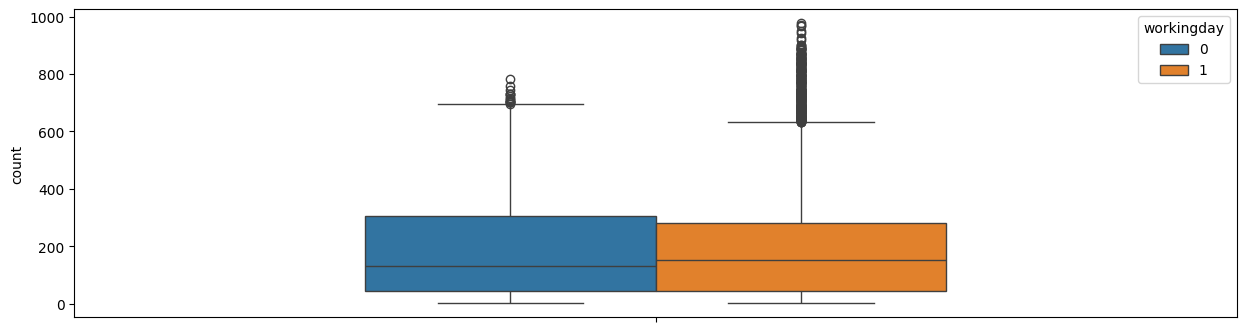

In [ ]:
plt.figure(figsize=(15,4))
sns.boxplot(data=df1, y='count', hue='workingday', width=0.5)
plt.show()

By looking at this graph i am not sure that mean of workingday and non_workingday are equal

In [ ]:
#importing library
from scipy.stats import f_oneway, levene
from scipy.stats import ttest_ind

In [ ]:
# filtering the data for working and non working day
workingday_df=df1[df1['workingday']==1]['count']
non_workingday_df=df1[df1['workingday']==0]['count']

In [ ]:
f_stat, p_value= f_oneway(workingday_df, non_workingday_df)
print('f_stat=>', f_stat)
print('p_value=>', p_value)

f_stat=> 2.2186657448173435
p_value=> 0.13638010918087484


In [ ]:
l_stat, p_value= levene(workingday_df, non_workingday_df)
print('l_stat=>', l_stat)
print('p_value=>', p_value)

l_stat=> 0.0228270545301747
p_value=> 0.8799105072297845


In [ ]:
t_stat, p_value=ttest_ind(workingday_df, non_workingday_df)
print('t_stat=>', t_stat)
print('p_value=>', p_value)

t_stat=> 1.4895186285566733
p_value=> 0.1363801091813147


In [ ]:
#at 5% significance level alpha= 0.05
alpha=0.05
p_value=p_value
if p_value< alpha:
  print("reject Ho=> Electric cycles are not equally distrubuted in each workingday and non_workingday so the mean of all two workingday are not equal.")
else:
  print("failed to reject Ho=> Electric cycles are equally distrubuted in each workingday and non_workingday so the mean of all two workingday are equal.")

failed to reject Ho=> Electric cycles are equally distrubuted in each workingday and non_workingday so the mean of all two workingday are equal.


# Insight
One way Anova test, ttest_ind, levene test between season and count

Setting null hypothesis and alternate hypothesis

Ho = Electric cycles are equally distrubuted in each workingday and non_workingday so the mean of all two workingday are equal.

Ha = Electric cycles are not equally distrubuted in each workingday and non_workingday so the mean of all two workingday are not equal.

Doing this test at 95% confidence level
alpha= 0.05

p_value=> 0.1363801091813147

 At 5% significance level we are failing null hypothesis Ho as p_value=> 0.1363801091813147  which is greater than alpha => Electric cycles are equally distrubuted in each workingday and non_workingday so the mean of all two workingday are equal.

# **Checking distribution between weather and count**

In [ ]:
# setting null hypothesis and alternate hypothesis
# Ho = Electric cycles are equally distrubuted in each weather clear, mist, lighsnow & heavyrain so the mean of all four weather are equal.
# Ha = Electric cycles are equally distrubuted in each weather clear, mist, lighsnow & heavyrain so the mean of all four weather are equal.

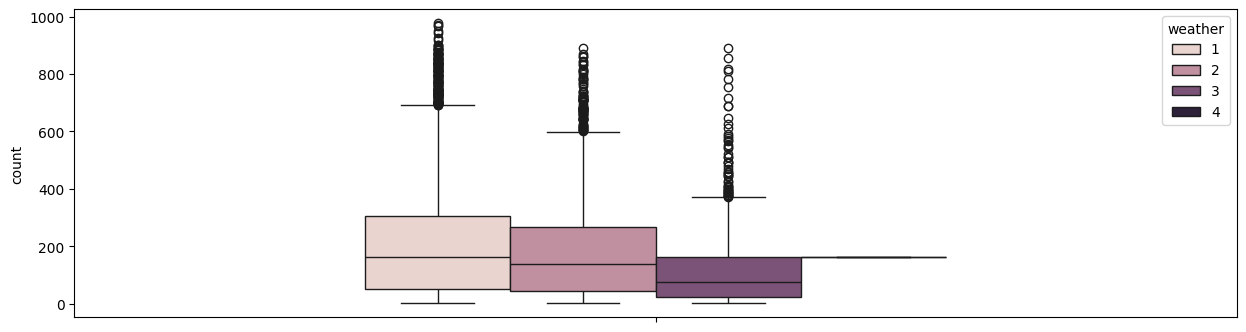

In [ ]:
plt.figure(figsize=(15,4))
sns.boxplot(data=df1, y='count', hue='weather', width=0.5)
plt.show()

By looking at this graph i am not sure that weather cycles are eqally distributed in each weather or not so here i will do one way anova hypothesis test

In [ ]:
#importing library
from scipy.stats import f_oneway

In [ ]:
# filtering the data for season wise
clear_weather_df=df1[df1['weather']==1]['count']
mist_weather_df=df1[df1['weather']==2]['count']
lightsnow_weather_df=df1[df1['weather']==3]['count']
heavyrain_weather_df=df1[df1['weather']==4]['count']

In [ ]:
f_stat, p_value= f_oneway(clear_weather_df, mist_weather_df, lightsnow_weather_df, heavyrain_weather_df)
print('f_stat=>', f_stat)
print('p_value=>', p_value)

f_stat=> 64.8208132147513
p_value=> 1.5638423078640776e-41


In [ ]:
#at 5% significance level alpha= 0.05
alpha=0.05
p_value=p_value
if p_value< alpha:
  print("reject Ho=> Electric cycles are not equally distrubuted in each weather clear, mist, lighsnow & heavyrain so the mean of all four weather are not equal.")
else:
  print("failed to reject Ho=> Electric cycles are equally distrubuted in each weather clear, mist, lighsnow & heavyrain so the mean of all four weather are equal.")

reject Ho=> Electric cycles are not equally distrubuted in each weather clear, mist, lighsnow & heavyrain so the mean of all four weather are not equal.


# Insight
One way Anova test, ttest_ind, levene test between season and count

Setting null hypothesis and alternate hypothesis

Ho = Electric cycles are equally distrubuted in each weather clear, mist, lighsnow & heavyrain so the mean of all four weather are equal.

Ha = Electric cycles are equally distrubuted in each weather clear, mist, lighsnow & heavyrain so the mean of all four weather are equal.

Doing this test at 95% confidence level
alpha= 0.05

p_value=> 1.5638423078640776e-41

 At 5% significance level we are rejecting null hypothesis Ho as p_value=> 1.5638423078640776e-41  which is less than alpha => Electric cycles are equally distrubuted in each weather clear, mist, lighsnow & heavyrain so the mean of all four weather are equal.

# **Insights**

**count:** As per above analysis data is not normally distributed. Dataset having more outlier towards right side.

 **season:** Season is uniformaly distributed spring 24%, summer 25%, fall 25%, winter 25% .

 **weather:** we get most clear waether 66% ,sometime we get mist weather 26% rear we get bad weather 7%.

 **workingday** 68% user rented cycle on working day and 31% rented on non_working day.

 **Atemp:** Atemp is almost uniform distibuted.

**windspeed:** windspeed having upper outlier.

**count:** count having more upper outlier.

**correlation** As per heatmap analysis Count and atemp ai highly correlated, weather and humidity is also correlated and season and weather is also highly correlated.

**Mann-Whitney U Test between workingday and count (data is not normally distributed.**

Setting null hypothesis and alternate hypothesis

Ho= "Working day has no effect on number of electric cycles rented."

Ha= "Working day has effect on number of electric cycles rented."

Doing this test at 95% confidence level
alpha= 0.05

p_value=0.681

 At 5% significance level we are failing to reject Ho as p_value is 0.681 which is greater than alpha => Working day has no effect on number of electric cycles rented.

**Kruskal-Wallis H Test  between season and count**

Setting null hypothesis and alternate hypothesis

Ho= "There is no difference in No.of cycle rented in seasons"

Ha= "There is difference in No.of cycle rented in seasons"

Doing this test at 95% confidence level
alpha= 0.05

p_value=> 1.2456924791629288e-135

 At 5% significance level we are rejecting null hypothesis Ho as p_value=> 1.2456924791629288e-135 which is less than alpha =>There is difference in No.of cycle rented in seasons

**Kruskal-Wallis H Test  between season and count**

Setting null hypothesis and alternate hypothesis

Ho= "There is no difference in No.of cycle rented in weather"

Ha= "There is difference in No.of cycle rented in weather"

Doing this test at 95% confidence level
alpha= 0.05

p_value=> 9.84421396060184e-44

 At 5% significance level we are rejecting null hypothesis Ho as p_value=> 9.84421396060184e-44 which is less than alpha => There is difference in No.of cycle rented in weather.

**Chi2 contingency test  between season and count**

Setting null hypothesis and alternate hypothesis

Ho= "Weather is not dependent on season"

Ha= "Weather is dependent on season"

Doing this test at 95% confidence level
alpha= 0.05

p_value=> 1.2783986926254513e-07

 At 5% significance level we are rejecting null hypothesis Ho as p_value=> 1.2783986926254513e-07 which is less than alpha => Weather is dependent on season

**One way Anova test  between season and count**

Setting null hypothesis and alternate hypothesis

Ho = Electric cycles are equally distrubuted in each season spring, summer, fall and winter so the mean of all four seasons are equal.

Ha = Electric cycles are not equally distrubuted in each season spring, summer, fall and winter so the mean of all four seasons are not equal.

Doing this test at 95% confidence level
alpha= 0.05

p_value=> 1.294051664486501e-138

 At 5% significance level we are rejecting null hypothesis Ho as p_value=> 1.294051664486501e-138  which is less than alpha => Electric cycles are not equally distrubuted in each season spring, summer, fall and winter so the mean of all four seasons are not equal.

**One way Anova test, ttest_ind, levene test between season and count**

Setting null hypothesis and alternate hypothesis

Ho = Electric cycles are equally distrubuted in each workingday and non_workingday so the mean of all two workingday are equal.

Ha = Electric cycles are not equally distrubuted in each workingday and non_workingday so the mean of all two workingday are not equal.

Doing this test at 95% confidence level
alpha= 0.05

p_value=> 0.1363801091813147

 At 5% significance level we are failing null hypothesis Ho as p_value=> 0.1363801091813147  which is greater than alpha => Electric cycles are equally distrubuted in each workingday and non_workingday so the mean of all two workingday are equal.

**One way Anova test between season and count**

Setting null hypothesis and alternate hypothesis

Ho = Electric cycles are equally distrubuted in each weather clear, mist, lighsnow & heavyrain so the mean of all four weather are equal.

Ha = Electric cycles are equally distrubuted in each weather clear, mist, lighsnow & heavyrain so the mean of all four weather are equal.

Doing this test at 95% confidence level
alpha= 0.05

p_value=> 1.5638423078640776e-41

 At 5% significance level we are rejecting null hypothesis Ho as p_value=> 1.5638423078640776e-41  which is less than alpha => Electric cycles are equally distrubuted in each weather clear, mist, lighsnow & heavyrain so the mean of all four weather are equal.


# **Recommendations**

**Resource Allocation:**
As per kruskal test the average electric rented demand are varying in seasons so company sould keep their EC ready in winter , fall and summer season at all their stations.

As per chi2 contingency test weather is depending on season so for clear weather their is high demand of EC so compnay shold ensure their  high EC availability of at their all stations.

**Demand Forecasting:**
As per above analysis in the clear weather which are winter summer and fall there is high demond of EC so company sould maintened there availability of EC at all the stations to achive high revenue.

**Marketing Strategies:**
As per above analysis in cealr weather which is winter, fall and summer there is high demond of EC so for these season company tailored some marketing strategy i.e offer more affordable rest for daily users, and for new user they sould give discount on the first ride.